# Pathological Fracture Predictive Model - Iodine Software

Greg Hennigan

## Objective

The goal of the project is to develop a prediction model which accurately predicts the presence of a pathological fracture (result = 'yes'). The model should maximize the number of positive cases it identifies where at least 2 out of every 3 positive predictions is correct.

In addition to results we're interested in your thought process. What did you try? What problems did you encounter? What ideas did you have for tackling those problems?

What is a pathological fracture? It is a bone fracture caused by disease that led to weakness of the bone structure. This process is most commonly due to osteoporosis, but may also be due to other pathologies such as: cancer, infection, inherited bone disorders,or a bone cyst.

###  Imports, Reading Data and Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('PathologicalFracturesDataSet.csv')

In [33]:
data.head(25)

,visitId,age,gender,result,xrayTestService,petScanService,ctTestService,C1882062,C1882062Historic,C1882062Negated,...,C1959794Historic,C1959794Negated,C1959794Uncertain,C1959794Surgical,C0016641,C0016641Historic,C0016641Negated,C0016641Uncertain,C0016641Surgical,Calcium
0,99573e,47,1,no,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.73
1,178636c,24,1,no,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.99
2,449781c,18,0,no,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.86
3,302680c,68,1,no,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.73
4,688176a,67,1,no,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.73
5,530234a,61,1,no,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.99
6,1534215a,38,1,no,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.61
7,1056026a,77,1,no,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.99
8,381390c,42,0,no,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6.99
9,263561c,66,1,no,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.86


Things to Note:

The columns 'xrayTestService', 'petScanService', and 'ctTestService indicate the number of times this service was used.

The majority of columns indicate a medical condition that references  UMLS codes (a large metathesaurus that accumulates medical concepts from lots of different sources and gives them unique codes).  

So if "pneumonia" is code C0032885 then:
C0032855 has a value of 1 if pneumonia was mentioned positively and about the current visit "patient has pneumonia"
C0032855history has a value of 1 if pneumonia was mentioned as a historical concept "patient has history of pneumonia"
C0032855negated has a value of 1 if pneumonia was mentioned as negated "pneumonia has been ruled out"
C0032855surgical has a value of 1 if pneumonia was mentioned as part of a surgical note (certain concepts have different semantics when talked about as part of a surgical procedure)

In [4]:
data.describe()

,age,gender,xrayTestService,petScanService,ctTestService,C1882062,C1882062Historic,C1882062Negated,C1882062Uncertain,C1882062Surgical,...,C1959794Historic,C1959794Negated,C1959794Uncertain,C1959794Surgical,C0016641,C0016641Historic,C0016641Negated,C0016641Uncertain,C0016641Surgical,Calcium
count,314772.000000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,...,314785.000000,314785.000000,314785.00000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,314785.000000,314747.000000
mean,61.765128,0.532157,3.516286,0.001309,0.681589,0.008742,0.000677,0.005922,0.015061,0.000334,...,0.000391,0.000064,0.00027,0.001925,0.005597,0.000737,0.000238,0.000273,0.002179,8.733544
std,17.305384,0.499106,8.239504,0.109603,2.805710,0.093092,0.026004,0.076723,0.121796,0.018261,...,0.019763,0.007971,0.01643,0.043834,0.074607,0.027138,0.015434,0.016527,0.046632,1.234179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.990000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.860000
50%,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.730000
75%,76.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.610000
max,85.000000,2.000000,378.000000,20.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.480000


In [5]:
data.groupby('result').describe()

C0001787  C0001787Historic  C0001787Negated  \
result                                                           
no     count  312907.000000     312907.000000           312907   
       mean        0.000054          0.000038                0   
       std         0.007371          0.006193                0   
       min         0.000000          0.000000                0   
       25%         0.000000          0.000000                0   
       50%         0.000000          0.000000                0   
       75%         0.000000          0.000000                0   
       max         1.000000          1.000000                0   
yes    count    1878.000000       1878.000000             1878   
       mean        0.008520          0.001065                0   
       std         0.091933          0.032625                0   
       min         0.000000          0.000000                0   
       25%         0.000000          0.000000                0   
       50%         0.000000          0.000000                0   
       75%         0.000000          0.000000                0   
       max         1.000000          1.000000                0   

              C0001787Surgical  C0001787Uncertain       C0003873  \
result                                                             
no     count            312907             312907  312907.000000   
       mean                  0                  0       0.016801   
       std                   0                  0       0.128524   
       min                   0                  0       0.000000   
       25%                   0                  0       0.000000   
       50%                   0                  0       0.000000   
       75%                   0                  0       0.000000   
       max                   0                  0       1.000000   
yes    count              1878               1878    1878.000000   
       mean                  0                  0       0.041534   
       std                   0                  0       0.199574   
       min                   0                  0       0.000000   
       25%                   0                  0       0.000000   
       50%                   0                  0       0.000000   
       75%                   0                  0       0.000000   
       max                   0                  0       1.000000   

              C0003873Historic  C0003873Negated  C0003873Surgical  \
result                                                              
no     count     312907.000000    312907.000000     312907.000000   
       mean           0.023406         0.001802          0.000147   
       std            0.151190         0.042417          0.012124   
       min            0.000000         0.000000          0.000000   
       25%            0.000000         0.000000          0.000000   
       50%            0.000000         0.000000          0.000000   
       75%            0.000000         0.000000          0.000000   
       max            1.000000         1.000000          1.000000   
yes    count       1878.000000      1878.000000       1878.000000   
       mean           0.052716         0.002130          0.001065   
       std            0.223525         0.046114          0.032625   
       min            0.000000         0.000000          0.000000   
       25%            0.000000         0.000000          0.000000   
       50%            0.000000         0.000000          0.000000   
       75%            0.000000         0.000000          0.000000   
       max            1.000000         1.000000          1.000000   

              C0003873Uncertain       ...                   age  \
result                                ...                         
no     count      312907.000000       ...         312894.000000   
       mean            0.001841       ...             61.713983   
       std             0.042865       ...             17.313881   
       min             0.00

In [41]:
data['ctTestService'].unique()

array([  0,   2,   1,   7,   5,  12,   4,  20,   3,  15,   9,  23,   6,
         8,  21,  47,  22,  10,  18,  17,  11,  19,  16,  39,  26,  36,
        13,  34,  24,  14,  32,  31,  27,  37,  30,  43,  25,  28,  29,
        38,  33,  35,  52,  46,  51,  48,  41,  42,  63,  49,  80,  45,
        65,  40,  44,  70,  71,  73,  54,  59,  60,  53,  67,  66,  62,
        50, 102,  76,  58,  69,  85,  56,  55,  68])

In [42]:
data['xrayTestService'].unique()

array([  0,   1,   2,   3,  14,  24,  34,   8,   6,  20,   4,   5,  21,
        11,   9,  12,  27,   7,  50,  68,  18,  26,  35,  15,  13,  19,
        28,  87,  58,  37,  96,  30,  90,  10,  36,  29,  22,  32,  51,
        44,  23,  16,  38,  92,  25,  17,  31,  48,  72,  97,  64,  41,
        45,  57,  78,  47,  43,  71,  65,  40,  55,  91,  33,  69,  63,
        49,  42,  81,  56,  86,  89,  59,  83,  67, 105,  62,  66,  39,
        73,  75, 130,  85, 168, 100,  94,  99,  52,  77,  80,  60,  82,
        46, 205,  76,  70,  53, 122, 111, 114, 103,  54,  74, 155, 104,
        84, 120, 117,  88, 148, 127, 138, 124,  79, 110,  93, 115,  61,
       144, 101, 109, 118, 244, 158, 154, 137, 339, 140, 187, 123, 106,
       146, 174, 107, 128, 189, 112, 153, 113, 301, 226, 181, 139, 116,
       177, 378, 147, 136, 152, 131, 183, 119, 162, 149, 185, 141, 195,
       121, 102, 234, 166, 182, 320,  95, 178, 135, 157,  98, 186, 143,
       180, 160, 269, 194, 151, 171, 132, 176, 192, 108, 196, 18

In [43]:
data['petScanService'].unique()

array([ 0,  9,  4,  3, 12,  1,  5, 11, 10,  7,  2, 14,  8, 13, 20])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x103cab150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c880c10>], dtype=object)

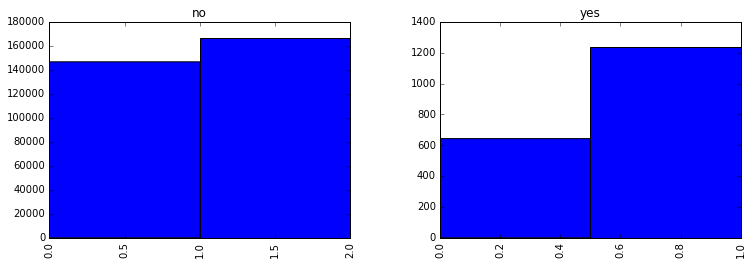

In [7]:
data.hist(column='gender', by='result', bins=2, figsize=(12,4), facecolor = 'blue')

In [8]:
data['gender'].unique()

array([1, 0, 2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11cfeb8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c95c850>], dtype=object)

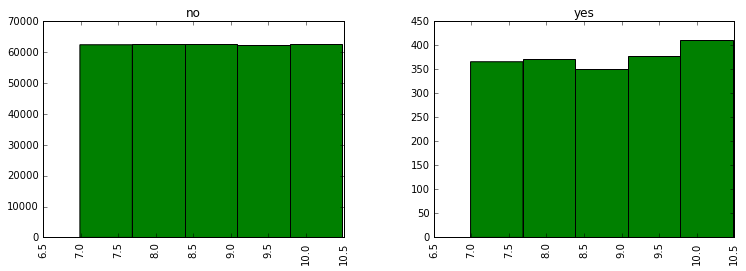

In [9]:
data.hist(column='Calcium', by='result', bins=5, figsize=(12,4), facecolor = 'green')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bac51d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c0e64d0>], dtype=object)

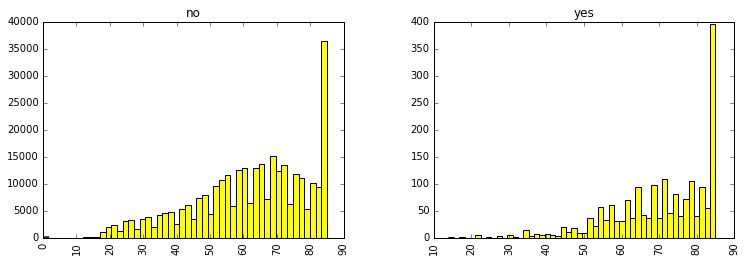

In [10]:
data.hist(column='age', by='result', bins=50, figsize=(12,4), facecolor = 'yellow')

## Notes:

The first thing that we see is that there are 1878 datapoints of a "yes" result and 312,907 datapoints of a "no" result. The classes are not equally balanced. If you guessed "no" every time you would be right 99.4% of the time. Also there are some null values in the "Age" and "Calcium" columns. There also looks like some genders are classified as a 2. How do we deal with class imbalance?

Good article for dealing with class imbalance: https://svds.com/learning-imbalanced-classes/



## Utility Functions

In [11]:
#Extract yes and no data. This function will sort between the yes and no values and return shuffled specified 
#amounts of each class. If testing = "yes" then 50 datapoints of "yes" and 50 datapoints of "no" values will 
#be returned.

def yes_no(data, amount_yes, amount_no, testing = False):
    sorted_data = data.sort_values('result')
    if testing == True:
        testing_yes_data = sorted_data[-50:]
        yes_data = sorted_data[312907:314735]
        no_data = sorted_data[:-amount_yes]
        no_data = shuffle(no_data)
        testing_no_data = no_data[-50:]
        no_data = sorted_data[:amount_no]
        return shuffle(yes_data), shuffle(no_data), shuffle(testing_yes_data), shuffle(testing_no_data)  
    else:
        yes_data = sorted_data[-amount_yes:]
        no_data = sorted_data[:-amount_yes]
        no_data = shuffle(no_data)
        no_data = sorted_data[:amount_no]
        return shuffle(yes_data), shuffle(no_data)
    
    
#Function that replaces result with binary classifiers
def results(result):
    if result == "yes":
        return 1
    if result == "no":
        return 0    
    
columns_to_normalize = ['age', 'Calcium', 'xrayTestService', 'petScanService', 'ctTestService']    

def extract_normalize(data):
    Y_data = data['result'].apply(results) 
    X_data = data.drop(['result', 'visitId'], axis = 1)
    for i in columns_to_normalize:
        X_data[i] = (X_data[i] - X_data[i].mean()) / X_data[i].std()  
    return X_data, Y_data

## Notes:

Since there are so few "yes" categories I thought it would be useful to create a function that would allow us to extract a certain amount for use. This function also allows us to pull test data from the yes and no cases.

The "extract_normalize" function will 1)seperate our X & Y data and convert the Y data to binary 2)remove columns 'result' and 'visitId' and 3) standardize the columns listed. I've miscalled the names in the function. What I'm doing is standardizing the columns above, not normalizing them. 

Why standardize? To better scale the data and allow for to speed up convergence.

## Idea - Put data into model for feature selection

Are all the features important? Can we eliminate some? The goal is to have equal amounts of the yes and no class, run them through the Decision Tree Classifier and determine how important they are. Once we find the most important ones we can eliminate the ones that are less important.

http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-10-213 

The goal is to take equal amounts of "yes" and "no" data and fit them into a Decision Tree model. We can then extract the feature importance to determine which columns to keep and which to eliminate.

Why reduce features? For improved performance. To minimize calculations with low significance. 

This quantity – the Gini importance I G – finally indicates how often a particular feature θ was selected for a split, and how large its overall discriminative value was for the classification problem under study.


In [34]:
#Pull some data for feature selection
yes, no = yes_no(data, 1878, 15000)
combined_data_for_feature = pd.concat([yes, no])

print "The data shape for combined yes and no data is:", combined_data_for_feature.shape

#Returns as a dataframe
X_data, Y_data = extract_normalize(combined_data_for_feature)

#Returns as a matrix
X = X_data.as_matrix()
Y = Y_data.as_matrix()

print "The data shape for normalized matrix is:", X.shape

The data shape for combined yes and no data is: (16878, 358)
The data shape for normalized matrix is: (16878, 356)


In [35]:
DTModel = DecisionTreeClassifier()
DTModel.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [36]:
importance = pd.DataFrame(zip(X_data.columns,DTModel.feature_importances_), columns = ['Column', 'Importance'])
importance.head(15)

,Column,Importance
0,age,0.127284
1,gender,0.021742
2,xrayTestService,0.083501
3,petScanService,0.000587
4,ctTestService,0.032604
5,C1882062,0.002293
6,C1882062Historic,0.000576
7,C1882062Negated,0.003559
8,C1882062Uncertain,0.005967
9,C1882062Surgical,0.000585


In [37]:
#How many have non-zero values?
non_zeros = importance[importance['Importance'] > 0].count()
non_zeros

Column        165
Importance    165
dtype: int64

In [16]:
#Keep high importance columns
columns_to_keep = []

def keep_columns(number):
    sorted_weights = importance.sort_values('Importance', ascending = False)
    Top_weights = sorted_weights[:number]
    for i in Top_weights['Column']:
        columns_to_keep.append(i)
    
def eliminate_columns(data):
    columns_to_eliminate = [col for col in data.columns if col not in columns_to_keep]
    clean_data = data[data.columns.difference(columns_to_eliminate)]
    return clean_data

In [17]:
keep_columns(200)
print "The number of columns to keep is:", len(columns_to_keep)

The number of columns to keep is: 200


Notes:

Although the number of non zero importance columns is around 165 I've decided to keep 200 columns in. The reason is that when choosing a larger dataset to train I wanted to give way to the possibility that if I grab a larger selection of samples in my training data that they might a non zero value that has slight importance.

## Now to get final data for model

How many samples of "yes" and samples of "no" do we want? 


In [18]:
multiplier = 5
yes_samples = 1828
no_samples = multiplier * yes_samples
print "Number of No samples is:", no_samples

Number of No samples is: 9140


In [19]:
yes_data, no_data, testing_yes_data, testing_no_data = yes_no(data, 1878, no_samples, testing = True)
multiplied_yes_data = pd.concat([yes_data]*multiplier)
combined_data = pd.concat([multiplied_yes_data, no_data])

In [20]:
#eliminate 2 columns, normalize
X_combined, Y_combined = extract_normalize(combined_data)
X_combined['Calcium'] = X_combined['Calcium'].fillna(value = X_combined['Calcium'].mean())
X_combined['age'] = X_combined['age'].fillna(value = data['age'].mean())

In [22]:
#Get training data as a matrix
Xtrain = eliminate_columns(X_combined).as_matrix()
Ytrain = Y_combined.as_matrix()

print "The shape of your X training data is:", Xtrain.shape
print "The shape of your Y training data is:", Ytrain.shape

The shape of your X training data is: (18280, 200)
The shape of your Y training data is: (18280,)


## Format Testing Data

My testing data is 100 samples of equal parts yes and no. These are pulled from untrained data.

In [23]:
Xyes_testing, Yyes_testing = extract_normalize(testing_yes_data) 
Xno_testing, Yno_testing = extract_normalize(testing_no_data)

In [24]:
#Fill in all null values
Xyes_testing = Xyes_testing.fillna(0) #This replaces null values with 0. Was 0 to begin with.
Xno_testing = Xno_testing.fillna(0)

In [25]:
#Eliminate additional columns
X_yes_test = eliminate_columns(Xyes_testing)
Y_yes_test = Yyes_testing
X_no_test = eliminate_columns(Xno_testing)
Y_no_test = Yno_testing

print "The shape of the yes X matrix is:", X_yes_test.shape
print "The shape of the yes Y matrix is:", Y_yes_test.shape
print "The shape of the no X matrix is:", X_no_test.shape
print "The shape of the no Y matrix is:", Y_no_test.shape

The shape of the yes X matrix is: (50, 200)
The shape of the yes Y matrix is: (50,)
The shape of the no X matrix is: (50, 200)
The shape of the no Y matrix is: (50,)


In [26]:
Xtest = pd.concat([X_yes_test, X_no_test]).as_matrix()
Ytest = pd.concat([Y_yes_test, Y_no_test]).as_matrix()

## Build a Neural Network

In [27]:
NNmodel = MLPClassifier(hidden_layer_sizes=(100,100,100),alpha=0.00001, max_iter=450)
NNmodel.fit(Xtrain, Ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=450, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [28]:
NNTrain_accuracy = NNmodel.score(Xtrain, Ytrain)
NNTest_accuracy = NNmodel.score(Xtest, Ytest)
print "Train accuracy:", NNTrain_accuracy, "Test accuracy:", NNTest_accuracy ,"\n"

Train accuracy: 0.960065645514 Test accuracy: 0.67 



In [29]:
true_class = Ytest
prediction = NNmodel.predict(Xtest)

#Precision Score
precision = precision_score(y_true = true_class, y_pred = prediction)
print "The precision score is:", precision

The precision score is: 0.774193548387


## Get more testing data:

Earlier I had equal parts yes and no data to test with. In reality the data should probably be more skewed toward the "no" category. Lets test with more "no" data.

In [30]:
#Get more no testing data
no_samples = 700

In [31]:
__, more_no = yes_no(data, 0, no_samples)
more_no_X, more_no_Y = extract_normalize(more_no)
more_no_X = eliminate_columns(more_no_X)
MoreXtest = pd.concat([X_yes_test, more_no_X]).as_matrix()
MoreYtest = pd.concat([Y_yes_test, more_no_Y]).as_matrix()
print "The shape of your X data is:", MoreXtest.shape

The shape of your X data is: (750, 200)


In [32]:
NNTrain_accuracy = NNmodel.score(Xtrain, Ytrain)
NNMoreTest_accuracy = NNmodel.score(MoreXtest, MoreYtest)
print "Train accuracy:", NNTrain_accuracy, "Test accuracy:", NNTest_accuracy ,"\n"

t_class = MoreYtest
pred = NNmodel.predict(MoreXtest)

prec = precision_score(y_true = t_class, y_pred = pred)
print "The precision score is:", prec

Train accuracy: 0.960065645514 Test accuracy: 0.67 

The precision score is: 0.727272727273


## Final Thoughts:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

There is probably a better way to apply feature selection. Next is to gain a greater understanding of PCA and apply it. 

Is a neural network the best way to go? Maybe, but would need to adjust/fine tune hyperparameters.

Why when the number of test samples is increased does the accuracy and precision go down? Aren't the weights already set? Is there a better way to train to eliminate the dropoff?

It would be nice to see some visualizations: seeing diminished cost function. Relationship of number of training samples used and precision. Number of columns used and precision. etc.